# Brownian Motion
George Poole grp39@cam.ac.uk

Consider a particle of mass $m$ in a liquid. In addition to the drag force $-\gamma\textbf{u}$, it will experience some random force $\boldsymbol{\xi}(t)$ due to the random jostling of all other partices in the liquid:

$$m\frac{\text{d}\textbf{u}}{\text{d}t}=-\gamma\textbf{u}(t)+\boldsymbol{\xi}(t)~~~.$$

Clearly, we cannot solve this directly since $\boldsymbol{\xi}(t)$ is unknown. We can however deduce some interesting properties.

By making the further assumption that the inertial term is zero, the problem effectively becomes a random walk.

$$\textbf{0}=-\gamma\textbf{u}(t)+\boldsymbol{\xi}(t)$$

$$\frac{\text{d}\textbf{x}}{\text{d}t}=\tfrac{1}{\gamma}\boldsymbol{\xi}(t)~~~.$$

We can ...

The equation of motion can however be integrated numerically. A simple numerical method uses a small time step $\Delta t$ to find the position $\textbf{x}_n$ at the $n^{\text{th}}$ step, given an initial position $\textbf{x}_0$.

$$\Delta\textbf{u}(t)=-(\tfrac{\gamma}{m}\textbf{u}(t)+\tfrac{1}{m}\boldsymbol{\xi}(t))\Delta t$$

$$\Delta\textbf{x}(t)=-(\tfrac{\gamma}{m}\textbf{u}(t)+\tfrac{1}{m}\boldsymbol{\xi}(t))(\Delta t)^2$$

$$\textbf{x}_n(t)=\textbf{x}_{n-1}(t)+\Delta\textbf{x}(t)$$

The components of the random force $\boldsymbol{\xi}(t)$ may be taken to be uniformly distributed on the interval $[-f,f]$ for some value $f$.

However, a problem with this method is evident: different $\Delta t$ would lead to wildly different trajectories. It is necessary to define a certain small collision time period $\tau_{\text{coll}}$ over which the value of $\boldsymbol{\xi}(t)$ remains constant.

The following Python program plots the trajectory of a particle confined to two dimensions for different values of the time step $\Delta t$.

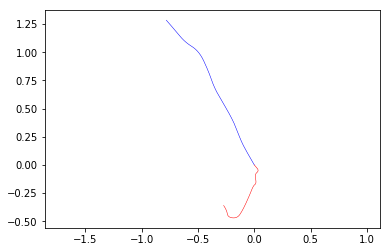

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import random as rand

def random_force(f,T_coll,T_total):
    #rand.seed(1234)
    rand_X, rand_Y=[],[]
    for i in range(0,int(T_total/T_coll)):
        rand_X.append(rand.uniform(-f,f))
        rand_Y.append(rand.uniform(-f,f))
            
    return rand_X, rand_Y
        
def trajectory(dt,gamma,mass,colour):
    T_total=10
    T_coll=0.0001
    steps=int(T_total/dt)

    x,y=0,0
    u_x,u_y=0,0
    x_vec,y_vec=[0],[0]
                   
    rand_X, rand_Y=random_force(1,T_coll,T_total)

    for i in range(0,steps):
        index=int(np.floor(i*dt))
        du_x=(-gamma*u_x+rand_X[index])*dt/mass
        du_y=(-gamma*u_y+rand_Y[index])*dt/mass
        u_x=u_x+du_x
        u_y=u_y+du_y
        dx=u_x*dt
        dy=u_y*dt
        x=x+dx
        y=y+dy
        x_vec.append(x)
        y_vec.append(y)

    plt.axis('equal')
    plt.plot(x_vec,y_vec,lw=0.5,color=colour)
    
gamma=2
mass=10

trajectory(0.001,gamma,mass,'b')
trajectory(0.002,gamma,mass,'r')
plt.show()

## References
* Part II Physics, Thermal & Statistical Physics
* DAMTP Graduate Course, Kinetic Theory

In [58]:
random_force(12.3,1,0.001)

(1, 0)